In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [56]:
data = fetch_california_housing()
X_raw = data.data
Y = data.target.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [57]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [58]:
print(Y.shape[0])

20640


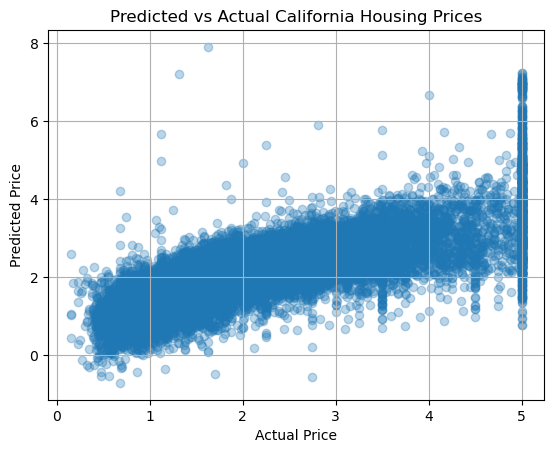

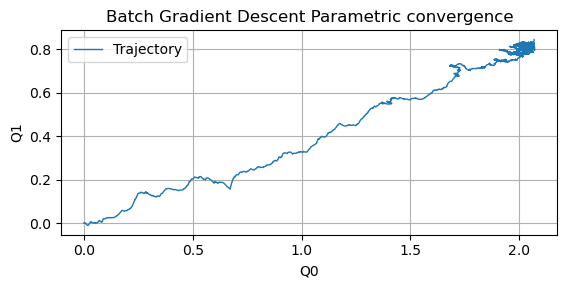

2.068557596351337
0.8434093774171373
0.14270784044294615
-0.25161144189440393
0.2766122920490745
0.004033549349431412
-0.04164663648804724
-0.7123120055200576
-0.6826388099756023


In [59]:
m = X_scaled.shape[0]
ones = np.ones((m, 1))
X = np.hstack([ones, X_scaled])
Q = np.zeros((X.shape[1], 1))
def grad(Xi, Yi, Q):
    Hi = Xi @ Q
    return (Xi.T*(Hi - Yi))
a = 1e-4
Qz = [0 + 0j]
p = 0
epochs = 10
while(p < epochs):
    i = 0
    while(i < X.shape[0]):
        Xi = X[[i], :]
        Yi = Y[[i], :]
        Q -= a*grad(Xi, Yi, Q)
        zn = Q[0, 0] + Q[1, 0]*1j
        Qz.append(zn)
        i += 1
    a *= 0.9
    p += 1
def grad_(X, Y, Q):
   H = X @ Q
   return (X.T @ (H - Y))/X.shape[0]
j = 0
b = 1e-3
iters = 10000
while(j < iters):
    Q -= b*grad_(X, Y, Q)
    zn = Q[0, 0] + Q[1, 0]*1j
    Qz.append(zn)
    j += 1
df = pd.DataFrame(Qz, columns = ["Z"])
df["Re"] = df["Z"].apply(lambda x: x.real)
df["Im"] = df["Z"].apply(lambda x: x.imag)
H = X @ Q
plt.scatter(Y, H, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual California Housing Prices")
plt.grid(True)
plt.show()
plt.plot(df["Re"], df["Im"], label="Trajectory", linewidth=1)
plt.xlabel("Q0")
plt.ylabel("Q1")
plt.title("Batch Gradient Descent Parametric convergence")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.show()
k = 0
while(k < X.shape[1]):
    print(Q[k, 0])
    k += 1
#Uncomment the below lines to check closeness with analytically computed values.

#theta = np.linalg.inv(X.T @ X) @ X.T @ Y
#k = 0
#while(k < X.shape[1]):
#    print(theta[k, 0])
#    k += 1